In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math

In [2]:
#function for transmission in an all pass ring

def Tsymthru(wavelength, neff, abscoef_power, r, radius):
    phase=4*math.pi**2*radius*neff/wavelength
    round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
    Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
    Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
    return Numer/Denom
def dB2Frac(dB):
    return 10**(dB/10)

In [3]:
#this is the transmission data that can be changed for every iteration

V0_T= np.loadtxt("../RT-Transmission-Data/0V-RT-Data.csv", delimiter=",")
x = V0_T[:,0] 
y = V0_T[:,1]

In [4]:
x = x[:-2]
y = y[:-2]

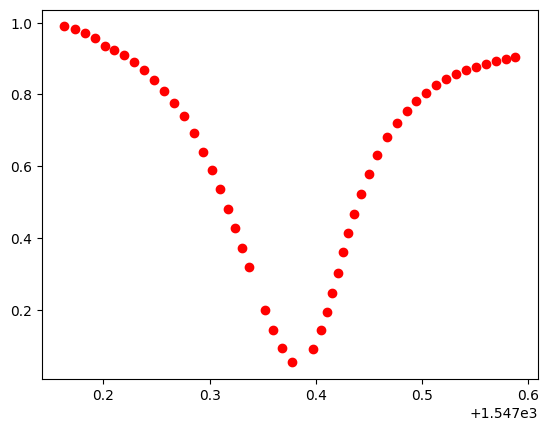

In [5]:
plt.plot(x, y, 'ro', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [6]:
def Guess(wavelength,neff, abscoef_power):
    return Tsymthru(wavelength, neff, abscoef_power, 0.987, 10e-6)

In [7]:
neff_m_88 = 88*1547.39/(10000*2*math.pi)
print(neff_m_88)

2.167217953040518


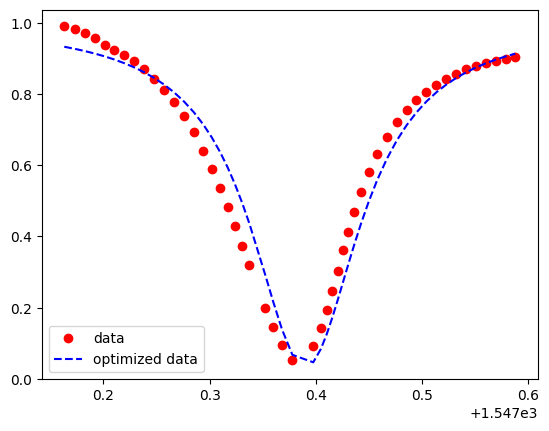

In [8]:
ans = Guess(x*1e-9,neff_m_88, 290)

plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [9]:
fit_params_arr=np.zeros([len(y)+1,2])
fit_params_arr[0]=[neff_m_88, 290]
for i in range(len(y)):
    fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x*1e-9,y,p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]

print(fit_params_arr)

[[  2.16720372 296.22646055]
 [  2.16720372 296.22672851]
 [  2.16720372 296.22660821]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372 296.22671488]
 [  2.16720372

In [10]:
fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])

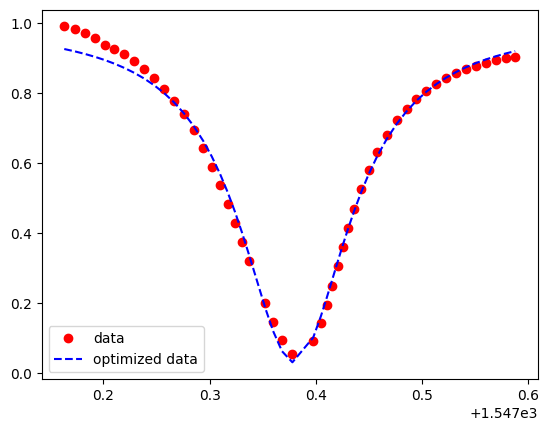

In [11]:
plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, fit_ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.savefig("fitdata.png")
plt.show()